In [12]:
def read_all_file(filename):
    with open(filename) as f:
        list_ = f.read().splitlines()

    return list_


lines = read_all_file('../data/output/tuning/jdt_direct-best-base-and-best-mapper/jdt_direct_descending-confidence.txt')

x_list = []
y_list = []
z_list = []
c_list = []
seen = []

a1 = {}
for line in lines:
    key , c = line.split(':')
    a1[key] = float(c)

    
a1_sorted_keys = sorted(a1, key=a1.get, reverse=True)
counter = 0
for key in a1_sorted_keys:
    x, y, z = key.split('_')
    c = a1[key]
#     c = float(c) * 100
#     if c < 47.2:
#         c = 0
#     else:
#         c = (c - 47.2) 
#     if c == 0:
#         continue
    counter += 1
    if counter == 128:
        break
    c = c * 1000
    x_list.append(float(x))
    y_list.append(float(y))
    z_list.append(float(z))
    c_list.append(float(c))

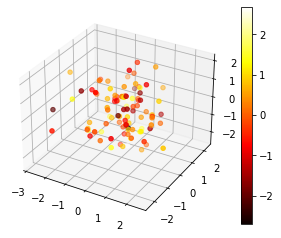

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.random.standard_normal(100)
y = np.random.standard_normal(100)
z = np.random.standard_normal(100)
c = np.random.standard_normal(100)

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

In [13]:
import pandas as pd
import plotly
import plotly.graph_objs as go


#Set marker properties
markercolor = c_list

#Make Plotly figure
fig1 = go.Scatter3d(x=x_list,
                    y=y_list,
                    z=z_list,
                    marker=dict(color=markercolor,
                                opacity=1,
                                reversescale=False,
                                colorscale='blues',
                                size=5),
                    line=dict (width=0.2),
                    mode='markers')


#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="History Score", range=[0,1]),
                                yaxis=dict( title="Code Score", range=[0,1]),
                                zaxis=dict(title="API Score", range=[0,1])),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("4DPlot.html"))

'4DPlot.html'

In [18]:
lines = read_all_file('../data/output/tuning/jdt-direct-l2r-style/jdt_direct_only-bsba.txt')

a1 = {}
for line in lines:
    key , c = line.split(':')
    a1[key] = float(c)

    
a1_sorted_keys = sorted(a1, key=a1.get, reverse=True)

print(a1_sorted_keys[0])
print(a1[a1_sorted_keys[0]])

0.9_0.55_0
0.4842105263157895
